**Name: Rohan Dayal**  
**Roll No.: 19CO060**  
**DL Experiment 1**

## Problem Statement :-
Implement Boston housing price prediction problem by Linear regression using Deep Neural network. Use Boston House price prediction dataset.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

2023-05-07 22:13:50.654945: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-07 22:13:50.732983: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-07 22:13:50.734513: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-07 22:13:52.105864: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Data Collection :-

In [2]:
data = pd.read_csv('boston.csv', index_col='Unnamed: 0')
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA :-

In [3]:
data.shape

(506, 14)

In [4]:
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [5]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<Axes: xlabel='Price', ylabel='CRIM'>

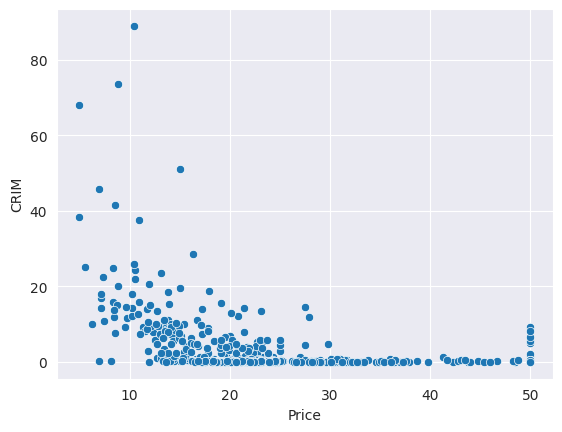

In [6]:
sns.scatterplot(data=data, y='CRIM', x='Price')

<Axes: >

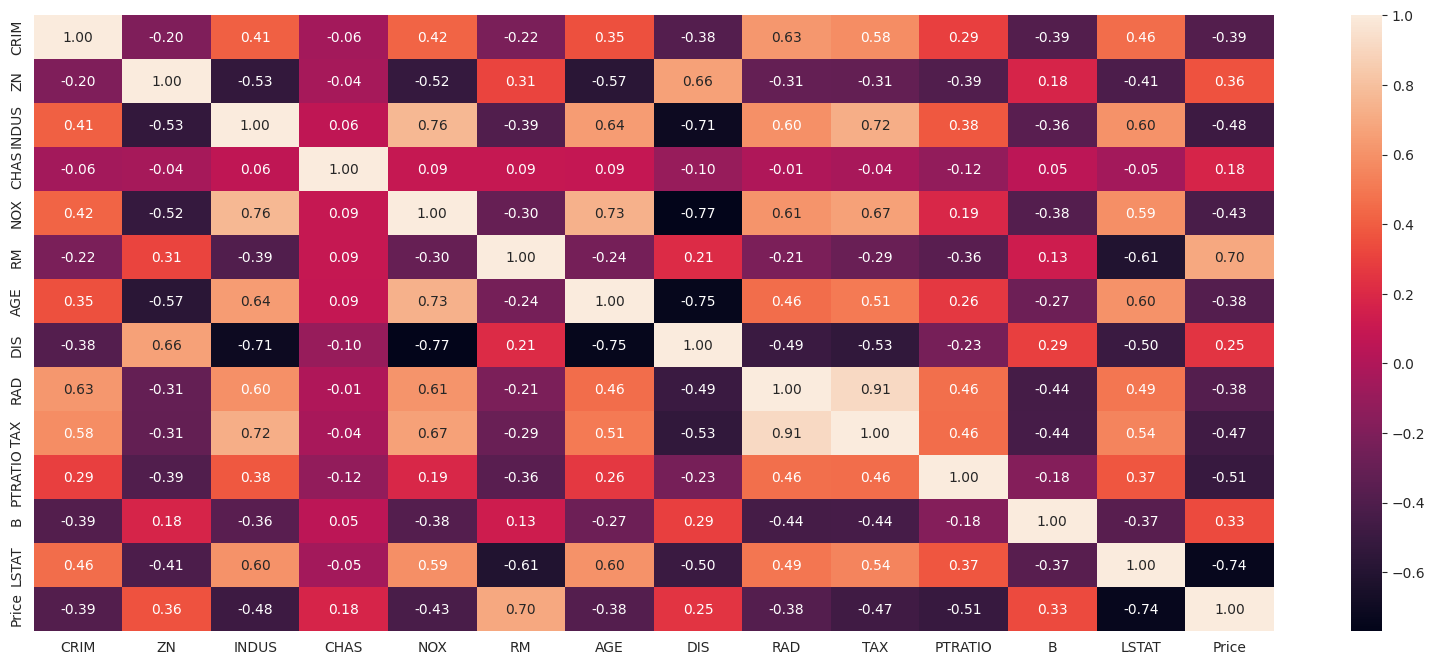

In [7]:
fig = plt.figure(figsize=(20,8))
sns.heatmap(data.corr(), annot=True, fmt='.2f')

In [8]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
mm = MinMaxScaler()
X = mm.fit_transform(X)

In [9]:
X.shape

(506, 13)

<Axes: >

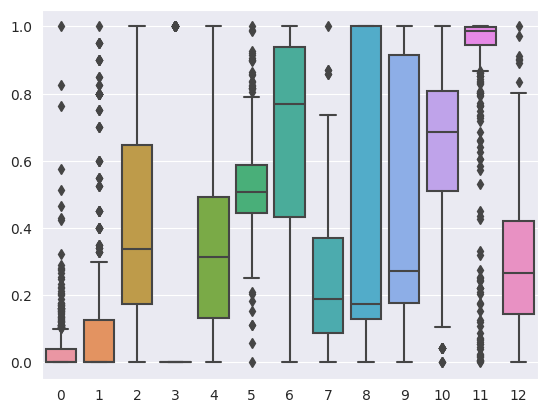

In [10]:
sns.boxplot(X)

<Axes: >

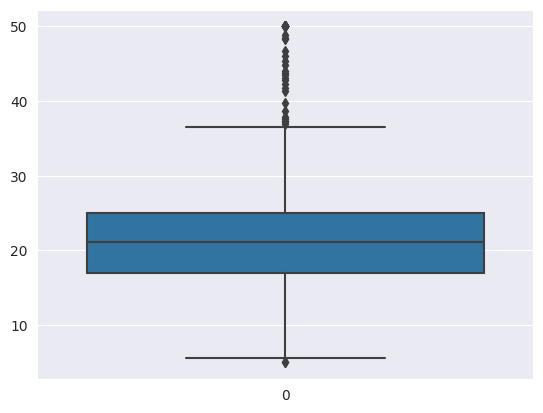

In [11]:
sns.boxplot(y)

## Feature Selection :-

In [12]:
data = data.loc[(data['Price'] < 50.0)]

In [13]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
mm = MinMaxScaler()
X = mm.fit_transform(X)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [15]:
X_train.shape

(392, 13)

## Model Building :-

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation='relu', input_shape = (13,)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(1, name='Output')
  ])

2023-05-07 22:13:56.204434: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-07 22:13:56.205482: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [17]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                700       
                                                                 
 dense_1 (Dense)             (None, 100)               5100      
                                                                 
 dense_2 (Dense)             (None, 30)                3030      
                                                                 
 Output (Dense)              (None, 1)                 31        
                                                                 
Total params: 8,861
Trainable params: 8,861
Non-trainable params: 0
_________________________________________________________________


## Model Evaluation :-

In [19]:
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=30)

Epoch 1/30
13/13 [==============================] - 1s 25ms/step - loss: 529.9929 - val_loss: 416.3137
Epoch 2/30
13/13 [==============================] - 0s 8ms/step - loss: 481.3101 - val_loss: 351.8971
Epoch 3/30
13/13 [==============================] - 0s 11ms/step - loss: 382.9282 - val_loss: 232.7074
Epoch 4/30
13/13 [==============================] - 0s 8ms/step - loss: 227.4317 - val_loss: 122.7981
Epoch 5/30
13/13 [==============================] - 0s 7ms/step - loss: 144.5484 - val_loss: 125.4935
Epoch 6/30
13/13 [==============================] - 0s 7ms/step - loss: 115.9515 - val_loss: 83.4884
Epoch 7/30
13/13 [==============================] - 0s 8ms/step - loss: 94.7420 - val_loss: 65.3923
Epoch 8/30
13/13 [==============================] - 0s 8ms/step - loss: 74.5776 - val_loss: 52.1571
Epoch 9/30
13/13 [==============================] - 0s 7ms/step - loss: 58.0444 - val_loss: 38.6517
Epoch 10/30
13/13 [==============================] - 0s 8ms/step - loss: 45.9598 - val_

[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Loss')]

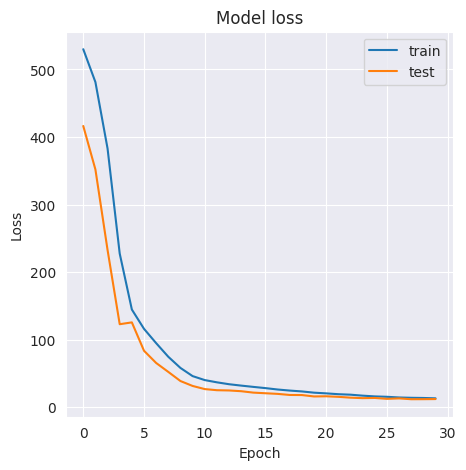

In [20]:
df_loss_acc = pd.DataFrame(history.history)
df_loss = df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'test'},inplace=True)
df_loss.plot(title='Model loss',figsize=(5,5)).set(xlabel='Epoch',ylabel='Loss')

In [21]:
mse = model.evaluate(X_test, y_test)
print(f"\nLoss:{(mse):.2f}")

4/4 [==============================] - 0s 4ms/step - loss: 11.9487

Loss:11.95
